In [33]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import community
# pip install netgraph
from netgraph import Graph

In [34]:
random_graph=nx.random_partition_graph([3, 5, 4, 7], 0.6, 0.1)

In [35]:
clustering=community.asyn_lpa_communities(random_graph)

Outer loop: Iterate over the communities

Inner loop: Iterate over nodes in each community

node_to_community dictionary stores which node belongs to which community

In [26]:
node_to_community = dict()
com_id=0
for cluster in clustering:
    for node in cluster:
        node_to_community[node]=com_id
        
    com_id+=1

This block basically plots the graphs and colors according to community

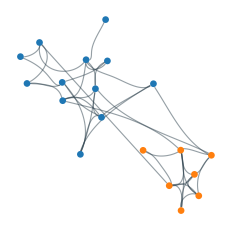

In [27]:
community_to_color = {
    0 : 'tab:blue',
    1 : 'tab:orange',
    2 : 'tab:green',
    3 : 'tab:red',
    4 : 'tab:pink'
}
node_color = {node: community_to_color[community_id] for node, community_id in node_to_community.items()}

Graph(random_graph,
      node_color=node_color, node_edge_width=0, edge_alpha=0.5,
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community),
      edge_layout='bundled'
)

plt.show()

In [28]:
nx.density(random_graph)

0.23976608187134502

Find average degree

\begin{equation}
\text { average degree }=\frac{1}{\text { number of vertices }} \sum_{v} \operatorname{deg}(v)
\end{equation}

In [29]:
def average_degree(G):
    sum_of_degrees=sum(dict(G.degree).values())
    num_of_nodes=G.number_of_nodes()
    avg_degree=sum_of_degrees/num_of_nodes
    return avg_degree

In [30]:
print(average_degree(random_graph))

4.315789473684211


In [36]:
coverage, performace = community.partition_quality(random_graph, clustering)

KeyError: 0

In [32]:
for block in clustering_copy:
    print(random_graph.subgraph(block).size())